## Atividade Pratica 3

### Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Verificação do Histograma

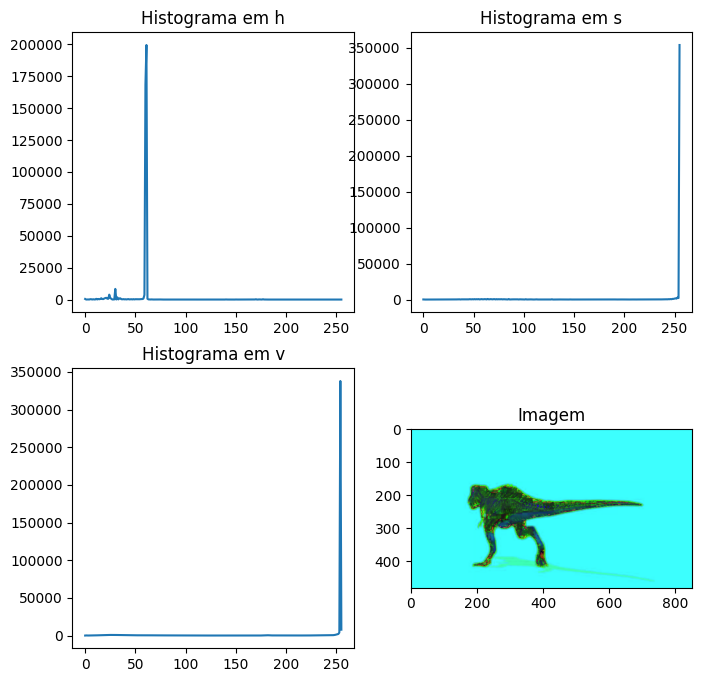

In [8]:
img_0 = cv2.imread('Imagens_ChromaKey/dino1.jpg')
img_0 = cv2.cvtColor(img_0, cv2.COLOR_BGR2HSV)
hist_0_h = cv2.calcHist([img_0],[0],None,[256],[0,256])
hist_0_s = cv2.calcHist([img_0],[1],None,[256],[0,256])
hist_0_v = cv2.calcHist([img_0],[2],None,[256],[0,256])

max_value = np.argmax(hist_0_h)
height, width, channels = img_0.shape


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.subplot(2, 2, 1)
plt.title("Histograma em h")
plt.plot(hist_0_h)

plt.subplot(2, 2, 2)
plt.title("Histograma em s")
plt.plot(hist_0_s)

plt.subplot(2, 2, 3)
plt.title("Histograma em v")
plt.plot(hist_0_v)

plt.subplot(2, 2, 4)
plt.title("Imagem")
plt.imshow(img_0)


## Carregamento da imagem que usaremos de fundo

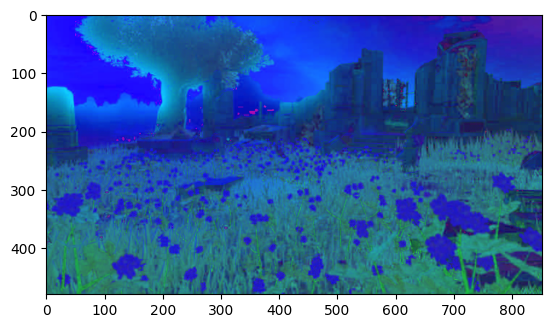

In [9]:
img_1 = cv2.imread('zelda.png')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)
dim = (width, height)
img_1 = cv2.resize(img_1,dim) 
plt.imshow(img_1)

## Algoritmo 

Usamos uma máscara, atribuindo o valor 1, se a primeira imagem(dinossauro) tem um pixel que corresponde ao intervalo de cor que mais apareceu no canal h da imagem.

In [10]:
array_mask = np.zeros((height,width))
intervalo_min = max_value - 4
intervalo_max = max_value + 4

h = 0
w = 0

while(h < height):
    w=0
    while(w < width):
        if(img_0[h][w][0] >= intervalo_min and img_0[h][w][0] <= intervalo_max ):
            array_mask[h][w] = 1
        w+=1
    h+=1



E então geramos uma nova imagem, atribuindo a ela os pixels da primeira imagem(dinossauro), quando a máscara for igual a 0 e atribuindo os pixels da segunda imagem(cenário de zelda) quando o pixel for igual a 1

In [11]:
nova_img = np.zeros((height,width,3), dtype=np.uint8)
h=0

while(h < height):
    w=0
    while(w < width):
        if(array_mask[h][w] == 0):
            nova_img[h][w][0] = img_0[h][w][0]
            nova_img[h][w][1] = img_0[h][w][1]
            nova_img[h][w][2] = img_0[h][w][2]
        elif(array_mask[h][w] == 1):
            nova_img[h][w][0] = img_1[h][w][0]
            nova_img[h][w][1] = img_1[h][w][1]
            nova_img[h][w][2] = img_1[h][w][2]
        w+=1
    h+=1

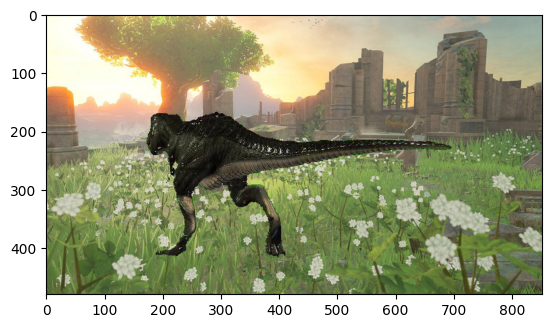

In [12]:
nova_img = cv2.cvtColor(nova_img, cv2.COLOR_HSV2RGB)
plt.imshow(nova_img)